<a href="https://colab.research.google.com/github/dustiny5/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505,2400,3027,2798,3700,3250,2689]
sales = pd.Series(sales)

In [15]:
def mean(sales):
  return sum(sales)/len(sales)
mean(sales)

3052.714285714286

In [19]:
def variance(sales):
  total = 0
  for i in sales:
    total += (i - mean(sales))**2
  return total/(len(sales)-1)
variance(sales)

214387.90476190473

In [20]:
def stddev(sales):
  return variance(sales)**0.5
stddev(sales)

463.0204150595357

In [18]:
#Check
sales.describe()

count       7.000000
mean     3052.714286
std       463.020415
min      2400.000000
25%      2743.500000
50%      3027.000000
75%      3377.500000
max      3700.000000
dtype: float64

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
sales_2 = [127,80,105,92,120,115,93]
sales_2 = pd.Series(sales_2)

In [36]:
total_sales = pd.DataFrame({'sales':sales, 'sales_2':sales_2})
total_sales.cov()

,sales,sales_2
sales,214387.904762,7604.357143
sales_2,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [38]:
total_sales.cov().loc['sales','sales_2'] / (stddev(sales) * stddev(sales_2))

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [40]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [41]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

(-1, 3)

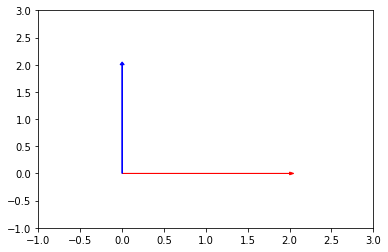

In [46]:
#Orthogonal aka perpendicular
v1 = [2,0]
v2 = [0,2]

plt.arrow(0,0, v1[0], v1[1], head_width=0.05, head_length=0.05, color='r')
plt.arrow(0,0, v2[0], v2[1], head_width=0.05, head_length=0.05, color='b')
plt.xlim(-1,3)
plt.ylim(-1,3)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [47]:
a = [-5,3,7]
b = [6,-8,2]

#It is not orthogonal because the dot product is not 0
np.dot(a,b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [62]:
c = np.array([2,-15,6,20])
c_m = np.asmatrix(c)

np.linalg.norm(c)**2

665.0

In [63]:
np.dot(c,c)

665

In [69]:
np.matmul(c_m, c_m.T)

matrix([[665]])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11\\-8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0\end{bmatrix} + 11\begin{bmatrix} 0 \\1\\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\0\\ 1 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [72]:
f = [4,12,11,9,2]

mag = np.linalg.norm(f)

unit_v_f = [i/mag for i in f]

unit_v_f

[0.20908334939572668,
 0.62725004818718,
 0.5749792108382483,
 0.470437536140385,
 0.10454167469786334]

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

Text(0.5, 1.0, 'Linearly Dependent')

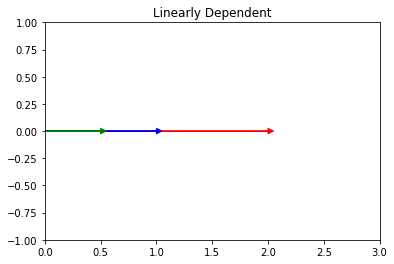

In [80]:
v = [1,0]
v2 = np.multiply(2,v)
v3 = np.multiply(0.5,v)

plt.xlim(0,3)
plt.ylim(-1,1)

plt.arrow(0,0,v2[0],v2[1],head_width=.05,head_length=.05,color='r')
plt.arrow(0,0,v[0],v[1],head_width=.05,head_length=.05,color='b')
plt.arrow(0,0,v3[0],v3[1],head_width=.05,head_length=.05,color='g')
plt.title('Linearly Dependent')

Text(0.5, 1.0, 'Linearly Independent')

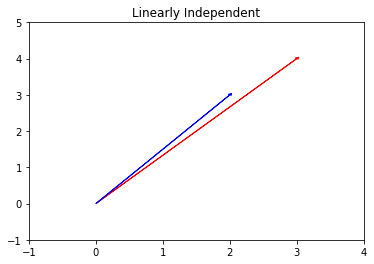

In [92]:
v = [2,3]
v2 = [3,4]


plt.xlim(-1,4)
plt.ylim(-1,5)

plt.arrow(0,0,v2[0],v2[1],head_width=.05,head_length=.05,color='r')
plt.arrow(0,0,v[0],v[1],head_width=.05,head_length=.05,color='b')

plt.title('Linearly Independent')

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# The span is 2
# Vector g and h is spans [1,2]. The h vector is a linear combination of g vector
# The h vector can also be written as 4[1,2]

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# The span is 3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:
a = [1,2]
b = [2,3]

plt.xlim

## 6.2 What does it mean to form a basis?

Set of linearly independent vectors that span the vector space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

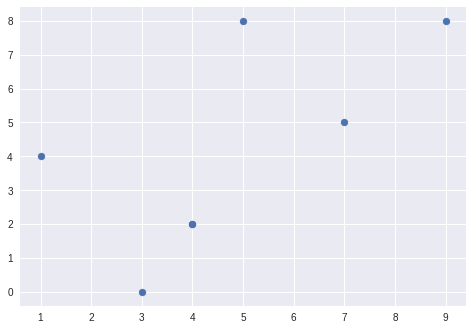

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()